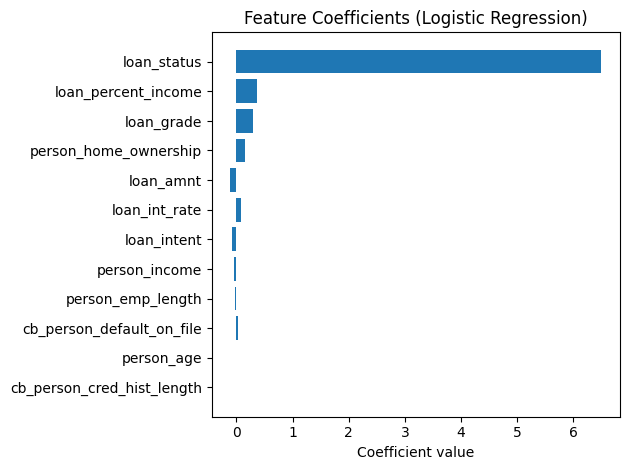

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("../data/raw/credit_risk_dataset.csv")


df['default'] = (df['loan_status'] > 0).astype(int)
df = df.drop(['risk_score'], axis=1, errors='ignore')
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').apply(LabelEncoder().fit_transform)
X = df.drop('default', axis=1)  # This has the correct feature names


model = joblib.load("model.pkl")


coefficients = model.coef_[0]
sorted_idx = np.argsort(np.abs(coefficients))
plt.barh(X.columns[sorted_idx], coefficients[sorted_idx])
plt.title("Feature Coefficients (Logistic Regression)")
plt.xlabel("Coefficient value")
plt.tight_layout()
plt.show()
